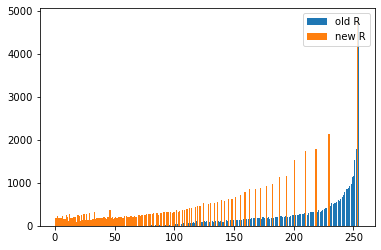

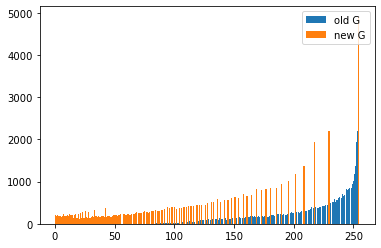

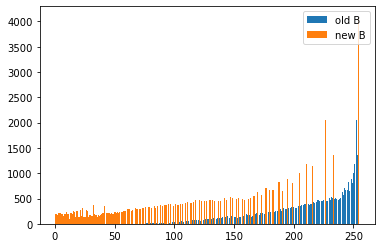

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# filename = "sample01.jpg"
# filename = "sample02.jpeg"
filename = "sample03.jpeg"
# filename = "sample04.jpeg"
# filename = "sample05.jpeg"
# filename = "sample06.jpg"
# filename = "sample07.jpg"
# filename = "sample08.jpg"
save_filename = "HE_" + filename

# import image and split into RGB arrays
img = Image.open(filename)

im_R, im_G, im_B = img.split()
im_R_array = np.asarray(im_R)
im_G_array = np.asarray(im_G)
im_B_array = np.asarray(im_B)

# Total no. of pixels
height = len(np.asarray(img))
width = len(np.asarray(img)[0])
N_pixels = height * width

# No. of bins
L = 256

# Histogram
histogram_R_array = np.bincount(im_R_array.flatten(), minlength=L)
histogram_G_array = np.bincount(im_G_array.flatten(), minlength=L)
histogram_B_array = np.bincount(im_B_array.flatten(), minlength=L)

# Probability
P_R_array = histogram_R_array / N_pixels
P_G_array = histogram_G_array / N_pixels
P_B_array = histogram_B_array / N_pixels

# Transformation function s_k
s_k_R_array = (L-1) * np.cumsum(P_R_array)
s_k_G_array = (L-1) * np.cumsum(P_G_array)
s_k_B_array = (L-1) * np.cumsum(P_B_array)

# Equalized histogram
eqhistogram_R_array = np.floor(s_k_R_array).astype(np.uint8)
eqhistogram_G_array = np.floor(s_k_G_array).astype(np.uint8)
eqhistogram_B_array = np.floor(s_k_B_array).astype(np.uint8)

# flatten image RGB arrays into 1D
im_R_flat = np.asarray(im_R).flatten()
im_G_flat = np.asarray(im_G).flatten()
im_B_flat = np.asarray(im_B).flatten()

# replace pixel values with values from equalized histogram to equalize
eq_img_R_flat = [eqhistogram_R_array[p] for p in im_R_flat]
eq_img_G_flat = [eqhistogram_G_array[p] for p in im_G_flat]
eq_img_B_flat = [eqhistogram_B_array[p] for p in im_B_flat]

# plot the old vs new histogram of the 3 RGB arrays
plt.figure(1)
plt.hist(im_R_array.flatten(),bins=L,label='old R')
plt.hist(eq_img_R_flat,bins=L,label='new R')
plt.legend(loc='upper right')
plt.show()

plt.figure(2)
plt.hist(im_G_array.flatten(),bins=L,label='old G')
plt.hist(eq_img_G_flat,bins=L,label='new G')
plt.legend(loc='upper right')
plt.show()

plt.figure(3)
plt.hist(im_B_array.flatten(),bins=L,label='old B')
plt.hist(eq_img_B_flat,bins=L,label='new B')
plt.legend(loc='upper right')
plt.show()

# reshape equalized pixel values back into original RGB array shape
eq_img_R_array = np.reshape(np.asarray(eq_img_R_flat), np.asarray(im_R).shape)
eq_img_G_array = np.reshape(np.asarray(eq_img_G_flat), np.asarray(im_G).shape)
eq_img_B_array = np.reshape(np.asarray(eq_img_B_flat), np.asarray(im_B).shape)

# merge RGB arrays into one and save as a RGB image file
eq_img = np.zeros((height,width,3), 'uint8')
eq_img[..., 0] = eq_img_R_array
eq_img[..., 1] = eq_img_G_array
eq_img[..., 2] = eq_img_B_array
eq_img = Image.fromarray(eq_img)
# eq_img.save(save_filename)


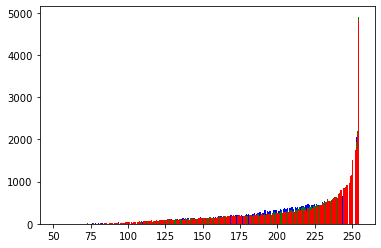

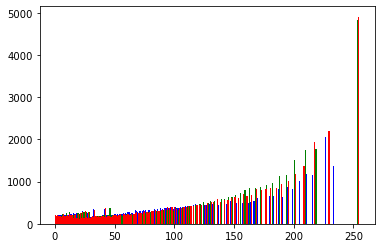

In [11]:
# plot the old vs new histogram of the 3 RGB arrays
plt.figure(1)
plt.hist(im_B_array.flatten(),bins=L,color='b')
plt.hist(im_G_array.flatten(),bins=L,color='g')
plt.hist(im_R_array.flatten(),bins=L,color='r')
plt.show()

plt.figure(2)
plt.hist(eq_img_B_flat,bins=L,color='b')
plt.hist(eq_img_R_flat,bins=L,color='g')
plt.hist(eq_img_G_flat,bins=L,color='r')
plt.show()